# Project: Predicting Boston House Prices

**Importing Libraries**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Importing Boston Housing Dataset**

In [31]:
df_boston = pd.read_csv('BostonHousing.csv')

In [32]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [33]:
X = df_boston.iloc[:, :-1].values
y = df_boston.iloc[:, -1].values

**Dataset Preprocessing**

In [34]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [35]:
df_boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [36]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Correlation b/w Features and Target**

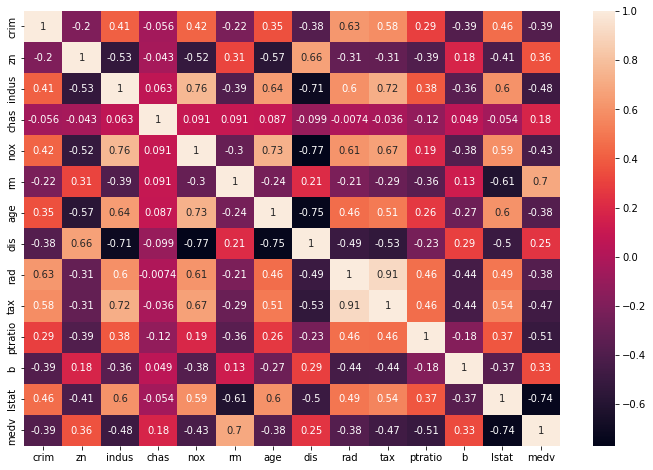

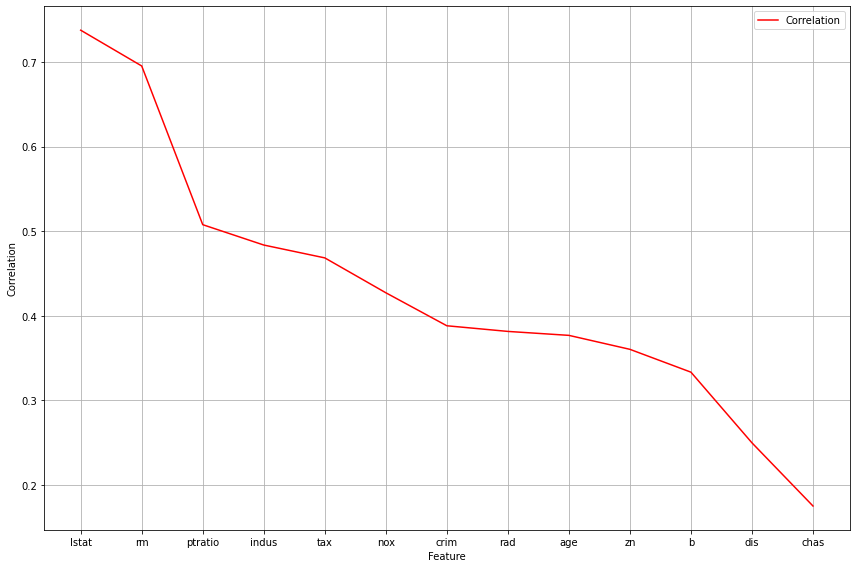

In [37]:
import seaborn as sns
cv= df_boston.corr()
fig, ax= plt.subplots(figsize=(12,8))
sns.heatmap(cv,ax=ax,annot=True)
plt.show()


plt.figure(figsize=(12,8))
plt.plot(abs(cv["medv"]).sort_values(ascending=False)[1:],label="Correlation",color="red")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

**Visual Analysis**

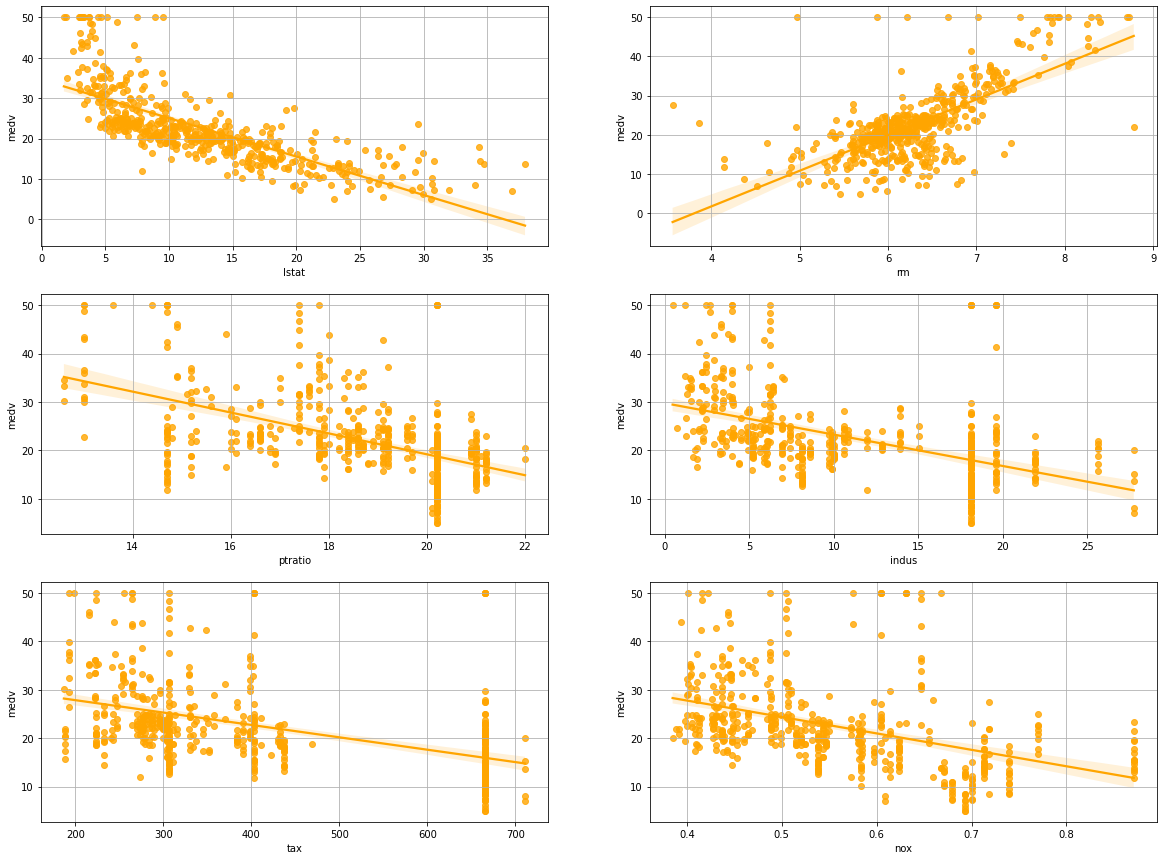

In [38]:
fig, ax1 = plt.subplots(3,2, figsize=(20,15))
k = 0
columns = ['lstat','rm','ptratio','indus','tax','nox']
for i in range(0,3):
    for j in range(0,2):
            sns.regplot(x= df_boston[columns[k]],y= df_boston["medv"],ax=ax1[i][j],color="orange")
            ax1[i][j].grid(True)
            k += 1
plt.show()

**Feature Selection**

In [39]:
#removing rad due to it's high covariance with tax.
#selecting the six most important features based on covariance with MEDV.
cols= ['rad','chas','dis','zn','b']
df_boston = df_boston.drop(columns=cols,inplace=True)

**Feature scaling(Standardisation)**

In [40]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X= sc_x.fit_transform(X)


**Splitting the dataset**

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

## Using Random Forest Regression Model

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=5)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=5)

**Training Accuracy**

In [43]:
y_pred= regressor.predict(X_train)
np.set_printoptions(precision=2)
print(np.concatenate((y_train.reshape(len(y_train),1) , y_pred.reshape(len(y_pred),1)),1))

[[11.8  11.59]
 [11.   11.71]
 [23.7  24.9 ]
 [35.4  34.73]
 [15.2  15.84]
 [24.4  24.34]
 [33.4  33.24]
 [31.6  32.01]
 [13.4  14.24]
 [34.9  34.07]
 [14.4  16.13]
 [35.4  34.27]
 [25.3  25.26]
 [18.3  18.64]
 [16.6  16.65]
 [13.4  13.13]
 [23.6  26.44]
 [27.5  25.64]
 [22.2  21.93]
 [17.7  18.43]
 [14.3  14.81]
 [21.7  21.71]
 [ 8.4  10.76]
 [15.3  17.53]
 [20.3  20.57]
 [32.   31.94]
 [20.   20.17]
 [19.1  17.4 ]
 [28.7  29.09]
 [46.   45.44]
 [22.6  21.99]
 [23.9  23.27]
 [21.9  20.88]
 [15.6  15.68]
 [50.   48.08]
 [25.   24.04]
 [37.9  36.11]
 [21.6  22.04]
 [19.3  19.56]
 [17.5  18.86]
 [22.9  22.02]
 [15.   18.15]
 [27.5  27.49]
 [10.2  11.21]
 [23.8  22.85]
 [23.9  24.43]
 [20.1  20.73]
 [16.5  19.21]
 [33.1  32.47]
 [14.6  14.63]
 [28.4  27.66]
 [23.7  23.67]
 [12.3  11.69]
 [31.5  32.36]
 [22.   22.1 ]
 [12.5  13.02]
 [35.1  33.8 ]
 [14.9  14.5 ]
 [22.9  23.18]
 [22.9  22.96]
 [19.3  19.62]
 [19.8  19.97]
 [20.   20.17]
 [29.6  28.02]
 [20.5  20.76]
 [29.   31.08]
 [20.7  20

In [44]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score for training data : %f"%r2_score(y_train,y_pred))
print("MSE for training data : %f"%mean_squared_error(y_train,y_pred))

R2 score for training data : 0.974172
MSE for training data : 2.062043


**Testing Accuracy**

In [45]:
y_pred= regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_test),1) , y_pred.reshape(len(y_pred),1)),1))

[[37.6  45.08]
 [27.9  28.54]
 [22.6  22.41]
 [13.8  11.64]
 [35.2  41.99]
 [10.4   8.13]
 [23.9  27.16]
 [29.   26.11]
 [22.8  24.25]
 [23.2  19.47]
 [33.2  34.69]
 [19.   20.32]
 [20.3  21.07]
 [36.1  32.91]
 [24.4  24.28]
 [17.2  19.6 ]
 [17.9  13.03]
 [19.6  18.39]
 [19.7  19.83]
 [15.   25.76]
 [ 8.1  15.37]
 [23.   18.67]
 [44.8  46.16]
 [23.1  22.06]
 [32.2  30.12]
 [10.8  10.45]
 [23.1  24.22]
 [21.2  20.11]
 [22.2  25.58]
 [24.1  26.16]
 [17.3  17.33]
 [ 7.   15.67]
 [12.7  11.04]
 [17.8  18.81]
 [26.4  23.09]
 [19.6  18.46]
 [25.1  25.22]
 [ 8.3   9.36]
 [48.8  45.68]
 [34.9  32.1 ]
 [13.8  14.76]
 [14.4  14.51]
 [30.1  25.31]
 [12.7  16.8 ]
 [27.1  24.35]
 [24.8  29.49]
 [ 7.    8.26]
 [20.5  18.12]
 [21.5  19.01]
 [14.   16.4 ]
 [20.4  19.56]
 [22.2  21.36]
 [21.4  22.23]
 [13.5  15.07]
 [19.4  16.92]
 [24.7  23.18]
 [43.8  42.77]
 [14.1  16.17]
 [28.6  26.84]
 [19.7  20.7 ]
 [16.8  20.34]
 [23.2  22.26]
 [16.2  16.78]
 [41.3  33.17]
 [22.7  20.67]
 [ 8.3  10.35]
 [18.4  18

In [46]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score for testing data : %f"%r2_score(y_test,y_pred))
print("MSE for testing data : %f"%mean_squared_error(y_test,y_pred))

R2 score for testing data : 0.870442
MSE for testing data : 12.319316


## Using XGB Regression Model

**Splitting the dataset**

In [47]:
from sklearn.model_selection import train_test_split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X,y,test_size=0.3,random_state=5)

**Hyperparameter Tuning**

In [48]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

regressor_xgb= xgb.XGBRegressor(eval_metric= 'rmsle')
param_grid = {"max_depth" : [1,2,3,4,5], 
              "n_estimators" : [400,500,600,700],
              "learning_rate" : [0.01,0.1,0.25,0.5]}

search= GridSearchCV(regressor_xgb,param_grid, cv=10).fit(X_train_xgb,y_train_xgb)
print("The best hyperparameters are : ",search.best_params_)

regressor_xgb= xgb.XGBRegressor(learning_rate= search.best_params_["learning_rate"],
                              n_estimators= search.best_params_["n_estimators"],
                              max_depth = search.best_params_["max_depth"],random_state= 5)

regressor_xgb.fit(X_train_xgb,y_train_xgb)

The best hyperparameters are :  {'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 500}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=5, ...)

**Training Accuracy**

In [49]:
y_pred_xgb= regressor_xgb.predict(X_train_xgb)
np.set_printoptions(precision=3)
print(np.concatenate((y_train_xgb.reshape(len(y_train_xgb),1) , y_pred_xgb.reshape(len(y_pred_xgb),1)),1))

[[11.8   11.798]
 [11.    11.   ]
 [23.7   23.703]
 [35.4   35.4  ]
 [15.2   15.201]
 [24.4   24.4  ]
 [33.4   33.401]
 [31.6   31.602]
 [13.4   13.4  ]
 [34.9   34.898]
 [14.4   14.399]
 [35.4   35.399]
 [25.3   25.299]
 [18.3   18.301]
 [16.6   16.598]
 [13.4   13.4  ]
 [23.6   23.601]
 [27.5   27.5  ]
 [22.2   22.198]
 [17.7   17.702]
 [14.3   14.301]
 [21.7   21.7  ]
 [ 8.4    8.4  ]
 [15.3   15.3  ]
 [20.3   20.301]
 [32.    31.999]
 [20.    20.001]
 [19.1   19.098]
 [28.7   28.699]
 [46.    46.001]
 [22.6   22.599]
 [23.9   23.899]
 [21.9   21.9  ]
 [15.6   15.602]
 [50.    50.   ]
 [25.    25.002]
 [37.9   37.899]
 [21.6   21.593]
 [19.3   19.301]
 [17.5   17.5  ]
 [22.9   22.9  ]
 [15.    15.   ]
 [27.5   27.496]
 [10.2   10.199]
 [23.8   23.801]
 [23.9   23.901]
 [20.1   20.098]
 [16.5   16.5  ]
 [33.1   33.102]
 [14.6   14.601]
 [28.4   28.398]
 [23.7   23.699]
 [12.3   12.297]
 [31.5   31.502]
 [22.    22.   ]
 [12.5   12.5  ]
 [35.1   35.099]
 [14.9   14.9  ]
 [22.9   22.89

In [50]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score for training data : %f"%r2_score(y_train_xgb,y_pred_xgb))
print("MSE for training data : %f"%mean_squared_error(y_train_xgb,y_pred_xgb))

R2 score for training data : 1.000000
MSE for training data : 0.000002


**Testing Accuracy**

In [51]:
y_pred_xgb= regressor_xgb.predict(X_test_xgb)
np.set_printoptions(precision=3)
print(np.concatenate((y_test_xgb.reshape(len(y_test_xgb),1) , y_pred_xgb.reshape(len(y_pred_xgb),1)),1))

[[37.6   42.876]
 [27.9   28.155]
 [22.6   22.184]
 [13.8    9.891]
 [35.2   37.962]
 [10.4    8.383]
 [23.9   22.603]
 [29.    26.784]
 [22.8   20.918]
 [23.2   19.918]
 [33.2   31.542]
 [19.    21.712]
 [20.3   20.758]
 [36.1   34.087]
 [24.4   24.075]
 [17.2   19.649]
 [17.9   10.976]
 [19.6   18.613]
 [19.7   18.807]
 [15.    30.706]
 [ 8.1   13.579]
 [23.    19.378]
 [44.8   47.182]
 [23.1   21.66 ]
 [32.2   28.332]
 [10.8   12.619]
 [23.1   23.805]
 [21.2   20.718]
 [22.2   24.01 ]
 [24.1   26.409]
 [17.3   16.404]
 [ 7.    13.663]
 [12.7   12.21 ]
 [17.8   16.411]
 [26.4   22.827]
 [19.6   18.808]
 [25.1   24.065]
 [ 8.3    9.113]
 [48.8   47.181]
 [34.9   33.022]
 [13.8   15.083]
 [14.4   14.822]
 [30.1   24.189]
 [12.7   17.805]
 [27.1   25.241]
 [24.8   26.159]
 [ 7.     7.337]
 [20.5   19.635]
 [21.5   19.489]
 [14.    14.171]
 [20.4   19.458]
 [22.2   21.4  ]
 [21.4   21.898]
 [13.5   13.815]
 [19.4   15.066]
 [24.7   23.197]
 [43.8   41.27 ]
 [14.1   15.368]
 [28.6   27.49

In [52]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score for testing data : %f"%r2_score(y_test_xgb,y_pred_xgb))
print("MSE for testing data : %f"%mean_squared_error(y_test_xgb,y_pred_xgb))

R2 score for testing data : 0.889872
MSE for testing data : 10.471719


In [53]:
regressor_xgb.predict([[0.006,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98]])

array([18.558], dtype=float32)